In [ ]:
#Here we are importing the file Istanbul from the documents
import pandas as pd
df = pd.read_csv("istanbul.csv",header = 1)
df

,date,ISE,ISE.1,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,5-Jan-09,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
1,6-Jan-09,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2,7-Jan-09,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
3,8-Jan-09,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
4,9-Jan-09,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802
...,...,...,...,...,...,...,...,...,...,...
531,16-Feb-11,0.008599,0.013400,0.006238,0.001925,0.007952,0.005717,0.018371,0.006975,0.003039
532,17-Feb-11,0.009310,0.015977,0.003071,-0.001186,0.000345,0.002620,0.001686,-0.000581,0.001039
533,18-Feb-11,0.000191,-0.001653,0.001923,0.002872,-0.000723,0.000568,0.005628,0.000572,0.006938
534,21-Feb-11,-0.013069,-0.013706,-0.020742,-0.014239,-0.011275,0.001358,-0.011942,-0.012615,-0.000958


In [ ]:
# CALL DATA WITH API
# Importing the data from the origin Website (A different alterntive)
import os

ISE_PATH = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00247/data_akbilgic.xlsx'

def load_ISE_data(ISE_path = ISE_PATH):
    excel_path = os.path.join(ISE_path)
    return pd.read_excel(excel_path)

# Display data
df = load_ISE_data()
df.head()

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Unnamed: 0,TL BASED,USD BASED,imkb_x,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,date,ISE,ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
1,2009-01-05 00:00:00,0.035754,0.038376,-0.004679,0.002193,0.003894,0,0.03119,0.012698,0.028524
2,2009-01-06 00:00:00,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.01892,0.011341,0.008773
3,2009-01-07 00:00:00,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
4,2009-01-08 00:00:00,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424


Pre processing, Training, Testing

In [ ]:
#Here, we are printing the information of the data frame. NOTE: we are not manipulating it yet.
df.info



<bound method DataFrame.info of               Unnamed: 0  TL BASED USD BASED    imkb_x Unnamed: 4 Unnamed: 5  \
0                   date       ISE       ISE        SP        DAX       FTSE   
1    2009-01-05 00:00:00  0.035754  0.038376 -0.004679   0.002193   0.003894   
2    2009-01-06 00:00:00  0.025426  0.031813  0.007787   0.008455   0.012866   
3    2009-01-07 00:00:00 -0.028862 -0.026353 -0.030469  -0.017833  -0.028735   
4    2009-01-08 00:00:00 -0.062208 -0.084716  0.003391  -0.011726  -0.000466   
..                   ...       ...       ...       ...        ...        ...   
532  2011-02-16 00:00:00  0.008599    0.0134  0.006238   0.001925   0.007952   
533  2011-02-17 00:00:00   0.00931  0.015977  0.003071  -0.001186   0.000345   
534  2011-02-18 00:00:00  0.000191 -0.001653  0.001923   0.002872  -0.000723   
535  2011-02-21 00:00:00 -0.013069 -0.013706 -0.020742  -0.014239  -0.011275   
536  2011-02-22 00:00:00 -0.007246 -0.019442         0  -0.000473  -0.002997   

    Unn

In [ ]:
#Returns the size of the data frame: (rows, columns)
df.shape


(537, 10)

In [ ]:
#Here, we get the column names of the data frame.
df.columns

Index(['Unnamed: 0', 'TL BASED', 'USD BASED', 'imkb_x', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')

In [ ]:
#This manipulation will return True if there are missing values. It will return False if the spot is not a 'null' value.
df.isnull()

,Unnamed: 0,TL BASED,USD BASED,imkb_x,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
532,False,False,False,False,False,False,False,False,False,False
533,False,False,False,False,False,False,False,False,False,False
534,False,False,False,False,False,False,False,False,False,False
535,False,False,False,False,False,False,False,False,False,False


In [ ]:
#This formula returns the description of the data frame. If it has numerical values, it will return the mean, std, count, etc.
df.describe()

,Unnamed: 0,TL BASED,USD BASED,imkb_x,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
count,537,537,537,537,537,537,537,537,537,537
unique,537,537,537,520,528,524,504,509,533,537
top,date,ISE,ISE,0,0,0,0,0,0,EM
freq,1,1,1,18,10,14,34,29,5,1


In [ ]:
# Attempt 1 WORKING (Declaring Artem Version)
import pandas as pd
import numpy as np

# ise = Istanbul Stock Exchange
ise_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00247/data_akbilgic.xlsx'

# Load data
df = pd.read_excel(ise_path, header=1)
df.head()
# Reads headers from row 1, but headers are in row 2, in excel file

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,date,ISE,ISE.1,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,2009-01-05,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
1,2009-01-06,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2,2009-01-07,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
3,2009-01-08,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
4,2009-01-09,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


In [ ]:
# Finds the Pairwise correlation of all columns in the data frame.
# CORRELATION MATRIX
df.corr()

,ISE,ISE.1,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
ISE,1.000000,0.942897,0.439489,0.602081,0.622948,0.260052,0.432898,0.655519,0.600295
ISE.1,0.942897,1.000000,0.449561,0.629218,0.648740,0.393225,0.446889,0.690761,0.701954
SP,0.439489,0.449561,1.000000,0.685843,0.657673,0.131250,0.722069,0.687550,0.528243
DAX,0.602081,0.629218,0.685843,1.000000,0.867369,0.258538,0.585791,0.936393,0.665162
FTSE,0.622948,0.648740,0.657673,0.867369,1.000000,0.255236,0.596287,0.948963,0.687543
NIKKEI,0.260052,0.393225,0.131250,0.258538,0.255236,1.000000,0.172752,0.283750,0.547288
BOVESPA,0.432898,0.446889,0.722069,0.585791,0.596287,0.172752,1.000000,0.621704,0.688074
EU,0.655519,0.690761,0.687550,0.936393,0.948963,0.283750,0.621704,1.000000,0.716502
EM,0.600295,0.701954,0.528243,0.665162,0.687543,0.547288,0.688074,0.716502,1.000000


In [ ]:
# Returns a box with graph demonstrating the values of the data frame.
#df.plot()
#df.plot(kind = "box")


In [ ]:
# Here we intend to drop null rows so it does not affect our data analysis
df.isna().sum()/len(df)
df.dropna(thresh=.8*len(df), axis=1, inplace=True)



In [ ]:
# The formula is to get rid of date column (take only numeric values)
df_numeric = df.select_dtypes(include=np.number)
df_numeric_columns = df_numeric.columns


In [ ]:
# Normalize columns and rows into a min and max
normalized_sub_df = (df_numeric-df_numeric.min())/(df_numeric.max()-df_numeric.min())
normalized_sub_df

,ISE,ISE.1,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,0.746889,0.664154,0.404333,0.489969,0.558409,0.451728,0.722875,0.530944,0.776771
1,0.668147,0.628741,0.505990,0.546240,0.643736,0.489000,0.618569,0.519229,0.548080
2,0.254242,0.314902,0.194024,0.310007,0.248066,0.606576,0.152590,0.273987,0.214765
3,0.000000,0.000000,0.470147,0.364884,0.516936,0.093003,0.698163,0.373348,0.221615
4,0.549467,0.509203,0.266894,0.291678,0.400483,0.411670,0.374747,0.326501,0.356172
...,...,...,...,...,...,...,...,...,...
531,0.539854,0.529392,0.493360,0.487558,0.597004,0.502925,0.613904,0.481545,0.481694
532,0.545277,0.543299,0.467534,0.459599,0.524650,0.475185,0.472073,0.416335,0.458533
533,0.475748,0.448175,0.458172,0.496068,0.514491,0.456817,0.505584,0.426279,0.526836
534,0.374650,0.383140,0.273345,0.342305,0.414130,0.463884,0.356235,0.312461,0.435419


In [ ]:
# Here we are importing numpy to have acess to the multidimensional arrays and matrix data structures. It also adds the possibilities of making calculations accross arrays and matrixes
# Return a subset of the DataFrame’s columns based on the column dtypes, in this case, we are including the numeric types
# We also code to fill 'nan' values with the mean of the series
import numpy as np
df.dtypes
numeric= df.select_dtypes(include=np.number)
numeric_columns=numeric.columns
numeric
df[numeric_columns]=df[numeric_columns].fillna(df.mean())
df.isna().sum()/len(df)*100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  if __name__ == '__main__':


date       0.0
ISE        0.0
ISE.1      0.0
SP         0.0
DAX        0.0
FTSE       0.0
NIKKEI     0.0
BOVESPA    0.0
EU         0.0
EM         0.0
dtype: float64

In [ ]:
# Here we are normalizing data into a 0 to 1 range, which will allow the data set to converge better weighting criteria leading to more accurate results
df_x = normalized_sub_df[["ISE.1","SP","DAX","FTSE","NIKKEI","BOVESPA","EU","EM"]]
df_y = normalized_sub_df.ISE

In [ ]:
#split the data into train and test subsets
# The train set is supposed to fit the model we aim to create; rather, the test set is needed for unbiased evaluation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x,df_y, test_size=0.2, random_state=42)

In [ ]:
# Here we are investigating about the shape (rows, columns) of the test and train subsets
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(428, 8) (108, 8) (428,) (108,)


In [ ]:
train_test_split(normalized_sub_df)

[          ISE     ISE.1        SP       DAX      FTSE    NIKKEI   BOVESPA  \
 87   0.465724  0.425160  0.636443  0.673331  0.657479  0.496580  0.681969   
 451  0.406988  0.415568  0.311977  0.434417  0.457220  0.490259  0.232974   
 221  0.340244  0.368470  0.438671  0.484523  0.514605  0.402699  0.344760   
 114  0.487163  0.444155  0.431217  0.301967  0.410641  0.532134  0.431142   
 326  0.569801  0.547242  0.507941  0.617478  0.613577  0.445085  0.484766   
 ..        ...       ...       ...       ...       ...       ...       ...   
 249  0.643082  0.642550  0.360126  0.606292  0.547762  0.543253  0.636426   
 14   0.517455  0.403093  0.486227  0.383631  0.522072  0.104221  0.510966   
 459  0.413106  0.450042  0.505522  0.537287  0.625684  0.456871  0.498509   
 24   0.753395  0.687802  0.658923  0.733607  0.662017  0.593616  0.791662   
 329  0.565851  0.540594  0.465264  0.705163  0.668964  0.627219  0.394540   
 
            EU        EM  
 87   0.566684  0.566121  
 451  0.

In [ ]:
# Train regression - decision tree in order to predict possible future outcomes. If the data generates a continous output, it means that it is not discrete.

from sklearn import tree

clf = tree.DecisionTreeRegressor()
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_pred




array([0.38221247, 0.53462504, 0.51836817, 0.48912559, 0.66037535,
       0.04159406, 0.471793  , 0.48381414, 0.46032114, 0.81905937,
       0.36690868, 0.55087272, 0.51836817, 0.66037535, 0.44521458,
       0.27667737, 0.50254641, 0.37999555, 0.62492782, 0.50598946,
       0.1651883 , 0.36077917, 0.51448583, 0.44043075, 0.46505493,
       0.56476022, 0.37694685, 0.48009577, 0.41761713, 0.57423314,
       0.46032114, 0.33952396, 0.59078763, 0.56780778, 0.56827004,
       0.66037535, 0.68877345, 0.46040392, 0.5745594 , 0.44315362,
       0.57886928, 0.65720215, 0.33169862, 0.45586319, 0.18159623,
       0.64985319, 0.6957004 , 0.55153987, 0.23027035, 0.65815819,
       0.45686812, 0.50598946, 0.54989016, 0.58360833, 0.72216958,
       0.33376851, 0.59862525, 0.42234639, 0.18159623, 0.33952396,
       0.55087272, 0.42370541, 0.55153987, 0.50598946, 0.41968975,
       0.48912559, 0.61826866, 0.54809438, 0.36617106, 0.52997778,
       0.35976513, 0.60458468, 0.87060541, 0.56504507, 1.     

In [ ]:
# Here we are finding key values for the analysis: variance, maxerror, MAE, MSE, MSLE, MAPE, MEDAE, and R^2

from sklearn import metrics
var = metrics.explained_variance_score(y_test, y_pred)

maxerror = metrics.max_error(y_test, y_pred)

mae = metrics.mean_absolute_error(y_test, y_pred)


mse = metrics.mean_squared_error(y_test, y_pred)


msle = metrics.mean_squared_log_error(y_test, y_pred)


mape = metrics.mean_absolute_percentage_error(y_test, y_pred)


medae = metrics.median_absolute_error(y_test, y_pred)


r2 = metrics.r2_score(y_test, y_pred)

print(var, maxerror, mae, mse, msle, mape, medae, r2)





0.7595125671153554 0.28629142917862693 0.048530781614898266 0.004674483097369749 0.0020433641098811916 0.11077828317418453 0.032110427036986855 0.7570910142806524


In [ ]:
# Printing the Y Test data - for vizualization purposes
y_test.to_numpy()

array([0.38593258, 0.52060346, 0.51099442, 0.50395945, 0.67162631,
       0.12823375, 0.59205221, 0.46530162, 0.53677439, 0.74852333,
       0.30379464, 0.53985409, 0.42730096, 0.64308176, 0.51233973,
       0.24524446, 0.42705154, 0.36420481, 0.62844894, 0.54852856,
       0.30127848, 0.38258101, 0.48842432, 0.40698798, 0.25424222,
       0.57467085, 0.37434744, 0.50480209, 0.46139586, 0.59262512,
       0.46858272, 0.36640358, 0.56767481, 0.5765328 , 0.46438096,
       0.75233773, 0.67933024, 0.27397921, 0.54791213, 0.43146415,
       0.67066923, 0.57935866, 0.38665122, 0.44255313, 0.23828423,
       0.67613921, 0.6423115 , 0.57879505, 0.20096457, 0.79035702,
       0.51802063, 0.52645087, 0.51631495, 0.58701368, 0.66121739,
       0.37013457, 0.5284696 , 0.51842789, 0.20920058, 0.35622544,
       0.51864023, 0.49342511, 0.47036832, 0.45524748, 0.38991381,
       0.47985842, 0.61530578, 0.53751498, 0.50896928, 0.50104792,
       0.31088111, 0.62607858, 0.71657509, 0.42466596, 0.71370

In [ ]:
# Here printing the Y Prediction data - for vizualization purposes
y_pred

array([0.38221247, 0.53462504, 0.51836817, 0.48912559, 0.66037535,
       0.04159406, 0.471793  , 0.48381414, 0.46032114, 0.81905937,
       0.36690868, 0.55087272, 0.51836817, 0.66037535, 0.44521458,
       0.27667737, 0.50254641, 0.37999555, 0.62492782, 0.50598946,
       0.1651883 , 0.36077917, 0.51448583, 0.44043075, 0.46505493,
       0.56476022, 0.37694685, 0.48009577, 0.41761713, 0.57423314,
       0.46032114, 0.33952396, 0.59078763, 0.56780778, 0.56827004,
       0.66037535, 0.68877345, 0.46040392, 0.5745594 , 0.44315362,
       0.57886928, 0.65720215, 0.33169862, 0.45586319, 0.18159623,
       0.64985319, 0.6957004 , 0.55153987, 0.23027035, 0.65815819,
       0.45686812, 0.50598946, 0.54989016, 0.58360833, 0.72216958,
       0.33376851, 0.59862525, 0.42234639, 0.18159623, 0.33952396,
       0.55087272, 0.42370541, 0.55153987, 0.50598946, 0.41968975,
       0.48912559, 0.61826866, 0.54809438, 0.36617106, 0.52997778,
       0.35976513, 0.60458468, 0.87060541, 0.56504507, 1.     

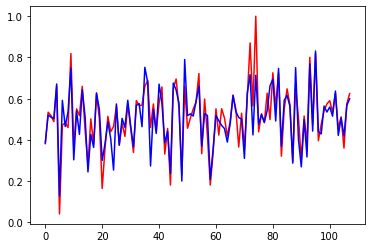

In [ ]:
# Here the we plot the test and the prediction data in order to visualize the paths. We can see that both datasets seem to overlap on multiple occasions.
# We can conclude that the prediction is accurate

import matplotlib.pyplot as plt

plt.plot(y_pred, color='red')
plt.plot(y_test.to_numpy(), color='blue')
plt.show()